# <center> Predicting Google stock prices <center>
    
__Introduction:__ In this project we will be predicting google stock prices using LSTM RNN. Usually it's dificult to predict the future price of a stock, but we can predict some trends. We will be trying to predict the upward and downword trends that exist in google stock prices. We will be train our LSTM model on 5 years of the google stock price starting from the begining of 2012 to the end of 2016. Then based on the correlations identified or captured by the LSTM of the google stock price, we will try to predict the first month of 2017.

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('..Datasets\\Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Data Preprocessing

In [3]:
# Feature Scaling using normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print("X_train:\n", X_train)
print("---------------------------------")
print("y_train:\n", y_train)

X_train:
 [[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
---------------------------------
y_train:
 [0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [5]:
# reshaping and adding more dimentionality to data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
#X_train

(1198, 60, 1)


### Building the RNN

In [6]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential        # creating NN object
from tensorflow.keras.layers import Dense             # The output layer
from tensorflow.keras.layers import LSTM              # The LSTM layer
from tensorflow.keras.layers import Dropout           # adding dropout regularization

In [7]:
# Initialising the RNN
regressor = Sequential()

In [8]:
# Adding the first LSTM layer and some Dropout regularisation to avoid overfitting
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [9]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [12]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [14]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 45s 37ms/sample - loss: 0.0403
Epoch 2/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0069
Epoch 3/100
1198/1198 [==============================] - 15s 12ms/sample - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 15s 12ms/sample - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 15s 13ms/sample - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 15s 13ms/sample - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 15s 13ms/sample - loss: 0.0040
Epoch 8/100
1198/1198 [==============================] - 15s 13ms/sample - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 16s 13ms/sample - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 14s 12ms/sample - loss: 0.0040
Epoch 12

### Making the predictions and visualising the results

In [18]:
# Getting the real stock price of january 2017
dataset_test = pd.read_csv('C:\\Users\\Baash\\Desktop\\Datasets\\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.shape

(20, 1)

In [19]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

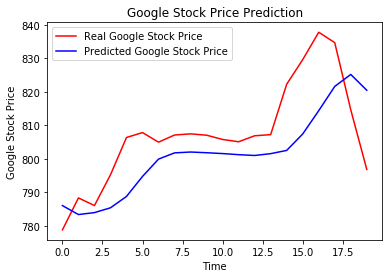

In [27]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
,plt.show()

# <center> THE END <center>